In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [4]:
data = pd.read_csv("Final_Project_Data/txt_files/taxi_2015_10.txt", sep = '|')

In [5]:
data.head()

,OBJECTID,TRIPTYPE,PROVIDERNAME,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,...,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LATITUDE,DESTINATION_BLOCK_LONGITUDE,DESTINATION_BLOCKNAME,AIRPORT,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR
0,7606919,1,VeriFone,7.57,0.00,0.25,0.0,0.0,7.82,2,...,8.0,38.905262,-77.048141,2110 - 2199 BLOCK OF M STREET NW,38.915932,-77.041657,1900 - 1923 BLOCK OF 18TH STREET NW,N,10/01/2015 00:00,10/01/2015 00:00
1,7611417,1,VeriFone,85.60,0.00,0.25,4.0,0.0,89.85,2,...,47.0,NaN,NaN,NaN,NaN,NaN,NaN,Y,10/01/2015 00:00,10/01/2015 00:00
2,7611418,1,Transco,21.34,0.00,0.25,2.0,0.0,23.59,2,...,17.0,38.902147,-76.935628,900 - 999 BLOCK OF 47TH STREET NE,NaN,NaN,NaN,N,10/01/2015 00:00,10/01/2015 00:00
3,7611419,1,Transco,20.80,4.21,0.25,0.0,0.0,25.26,1,...,25.0,38.897204,-77.008388,1 - 99 BLOCK OF MASSACHUSETTS AVENUE NE,38.931526,-77.101094,5000 - 5098 BLOCK OF KLINGLE STREET NW,N,10/01/2015 00:00,10/01/2015 00:00
4,7626639,1,DC VIP Cab,7.03,0.00,0.25,0.0,0.0,7.28,2,...,7.0,38.952536,-77.003107,100 - 299 BLOCK OF GALLOWAY STREET NE,NaN,NaN,NaN,N,10/01/2015 00:00,10/01/2015 00:00


In [6]:
data.isna().sum()

OBJECTID                            0
TRIPTYPE                            0
PROVIDERNAME                        0
FAREAMOUNT                        186
GRATUITYAMOUNT                      0
SURCHARGEAMOUNT                     0
EXTRAFAREAMOUNT                     0
TOLLAMOUNT                          0
TOTALAMOUNT                         0
PAYMENTTYPE                         0
ORIGINCITY                     365380
ORIGINSTATE                    347891
ORIGINZIP                           0
DESTINATIONCITY                397107
DESTINATIONSTATE               360568
DESTINATIONZIP                      0
MILEAGE                         13052
DURATION                       227524
ORIGIN_BLOCK_LATITUDE          189592
ORIGIN_BLOCK_LONGITUDE         189592
ORIGIN_BLOCKNAME               189592
DESTINATION_BLOCK_LATITUDE     315562
DESTINATION_BLOCK_LONGITUDE    315562
DESTINATION_BLOCKNAME          315562
AIRPORT                             0
ORIGINDATETIME_TR                   0
DESTINATIOND

In [7]:
data = data.dropna()

In [8]:
len(data)

711329

In [9]:
data['origin_time'] = pd.to_datetime(data['ORIGINDATETIME_TR'])
data['dest_time'] = pd.to_datetime(data['DESTINATIONDATETIME_TR'])
data.head()

,OBJECTID,TRIPTYPE,PROVIDERNAME,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,...,ORIGIN_BLOCK_LONGITUDE,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LATITUDE,DESTINATION_BLOCK_LONGITUDE,DESTINATION_BLOCKNAME,AIRPORT,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,origin_time,dest_time
0,7606919,1,VeriFone,7.57,0.00,0.25,0.0,0.0,7.82,2,...,-77.048141,2110 - 2199 BLOCK OF M STREET NW,38.915932,-77.041657,1900 - 1923 BLOCK OF 18TH STREET NW,N,10/01/2015 00:00,10/01/2015 00:00,2015-10-01 00:00:00,2015-10-01 00:00:00
3,7611419,1,Transco,20.80,4.21,0.25,0.0,0.0,25.26,1,...,-77.008388,1 - 99 BLOCK OF MASSACHUSETTS AVENUE NE,38.931526,-77.101094,5000 - 5098 BLOCK OF KLINGLE STREET NW,N,10/01/2015 00:00,10/01/2015 00:00,2015-10-01 00:00:00,2015-10-01 00:00:00
5,7666002,1,Hitch,14.47,0.00,0.25,0.0,0.0,14.47,1,...,-77.031953,1800 - 1823 BLOCK OF 14TH STREET NW,38.898048,-77.051799,2400 - 2448 BLOCK OF VIRGINIA AVENUE NW,N,10/31/2015 02:00,10/31/2015 02:00,2015-10-31 02:00:00,2015-10-31 02:00:00
6,7666003,1,Hitch,14.27,0.00,0.25,0.0,0.0,14.27,1,...,-77.031952,1820 - 1899 BLOCK OF 14TH STREET NW,38.890939,-77.002779,200 - 299 BLOCK OF A STREET NE,N,10/31/2015 02:00,10/31/2015 02:00,2015-10-31 02:00:00,2015-10-31 02:00:00
11,7666008,1,Hitch,13.50,0.00,0.25,0.0,0.0,13.50,1,...,-77.041683,1200 - 1217 BLOCK OF 18TH STREET NW,38.919667,-77.071037,2200 - 2298 BLOCK OF WISCONSIN AVENUE NW,N,10/31/2015 02:00,10/31/2015 02:00,2015-10-31 02:00:00,2015-10-31 02:00:00


In [10]:
data = data.drop(['ORIGINDATETIME_TR', 'DESTINATIONDATETIME_TR'], axis = 1)
data.head()

,OBJECTID,TRIPTYPE,PROVIDERNAME,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,...,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LATITUDE,DESTINATION_BLOCK_LONGITUDE,DESTINATION_BLOCKNAME,AIRPORT,origin_time,dest_time
0,7606919,1,VeriFone,7.57,0.00,0.25,0.0,0.0,7.82,2,...,8.0,38.905262,-77.048141,2110 - 2199 BLOCK OF M STREET NW,38.915932,-77.041657,1900 - 1923 BLOCK OF 18TH STREET NW,N,2015-10-01 00:00:00,2015-10-01 00:00:00
3,7611419,1,Transco,20.80,4.21,0.25,0.0,0.0,25.26,1,...,25.0,38.897204,-77.008388,1 - 99 BLOCK OF MASSACHUSETTS AVENUE NE,38.931526,-77.101094,5000 - 5098 BLOCK OF KLINGLE STREET NW,N,2015-10-01 00:00:00,2015-10-01 00:00:00
5,7666002,1,Hitch,14.47,0.00,0.25,0.0,0.0,14.47,1,...,13.0,38.914462,-77.031953,1800 - 1823 BLOCK OF 14TH STREET NW,38.898048,-77.051799,2400 - 2448 BLOCK OF VIRGINIA AVENUE NW,N,2015-10-31 02:00:00,2015-10-31 02:00:00
6,7666003,1,Hitch,14.27,0.00,0.25,0.0,0.0,14.27,1,...,15.0,38.915200,-77.031952,1820 - 1899 BLOCK OF 14TH STREET NW,38.890939,-77.002779,200 - 299 BLOCK OF A STREET NE,N,2015-10-31 02:00:00,2015-10-31 02:00:00
11,7666008,1,Hitch,13.50,0.00,0.25,0.0,0.0,13.50,1,...,12.0,38.906064,-77.041683,1200 - 1217 BLOCK OF 18TH STREET NW,38.919667,-77.071037,2200 - 2298 BLOCK OF WISCONSIN AVENUE NW,N,2015-10-31 02:00:00,2015-10-31 02:00:00


In [11]:
time_dict = {}

for x in data['origin_time']: 
    if x in time_dict: 
        time_dict[x] += 1 
    else: 
        time_dict[x] = 1 

In [12]:
time_df = pd.DataFrame.from_dict(time_dict, orient = 'index')

In [13]:
time_df['ride_count'] = time_df[0]
time_df = time_df.drop(0, axis = 1)

In [14]:
time_df.head()

,ride_count
2015-10-01 00:00:00,416
2015-10-31 02:00:00,1039
2015-10-31 01:00:00,1181
2015-10-31 03:00:00,544
2015-10-31 08:00:00,378


Text(0, 0.5, 'Hourly TaxiRide Count October 2015')

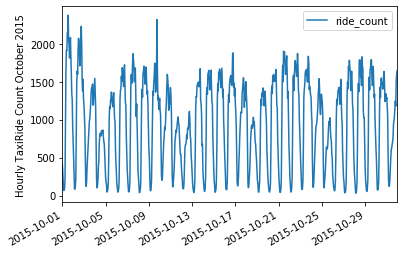

In [15]:
#bar plot of data
time_df.plot()
plt.ylabel('Hourly TaxiRide Count October 2015')

Text(0, 0.5, 'Weekly TaxiRide Count October 2015')

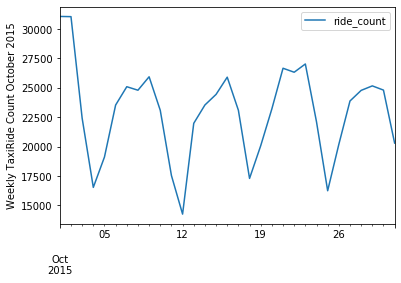

In [16]:
#hourly intervals are too narrow to make sense of data
#aggregate as weekly data instead
weekly = time_df.resample('D').sum()
weekly.plot() #line styles for each feature
plt.ylabel('Weekly TaxiRide Count October 2015')

In [17]:
oct_1 = time_df.loc['2015-10-1']

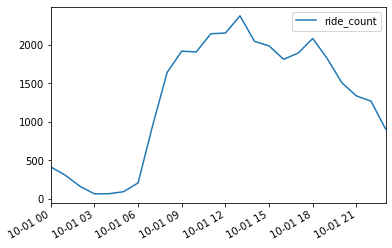

In [18]:
#Thursday 
oct_1.plot()

In [19]:
oct_2 = time_df.loc['2015-10-2']

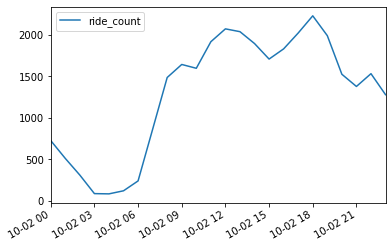

In [21]:
#Friday 
oct_2.plot()

In [22]:
oct_3 = time_df.loc['2015-10-3']

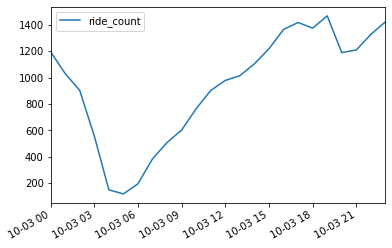

In [23]:
#Saturday 
oct_3.plot()

In [24]:
oct_4 = time_df.loc['2015-10-4']

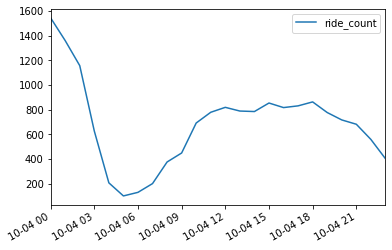

In [25]:
#Sunday
oct_4.plot()